<a href="https://colab.research.google.com/github/Bo-fromLA/Bo-fromLA/blob/main/CalHouse_FE%2C_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=1)

df1=df.copy()

kmeans.fit(df[['median_income']])
df1['6k_income_groups'] = kmeans.labels_

# Here we are just sorting the Kmeans labels by their ascending order

cluster_mins = df1.groupby('6k_income_groups')['median_income'].min()
sorted_clusters = cluster_mins.sort_values().index

new_labels = {old_label: new_label for new_label, old_label in enumerate(sorted_clusters)}
df1['6k_income_groups'] = df1['6k_income_groups'].map(new_labels)

#df1.head(2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df1['6q_house_values'] = pd.qcut(df1['median_house_value'], q=6, labels=False)
df1['7q_income_qcut'] = pd.qcut(df1['median_income'], q=7, labels=False)

kmeans_house_value = KMeans(n_clusters=2, random_state=1).fit(df1[['longitude', 'latitude', 'median_house_value']])
df1['2lat_lon_house_val']=kmeans_house_value.labels_
df1.head(2)

# df1.groupby('6_income_qcut')['median_income'].describe()
# df1.head(2)
# df1.columns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,6k_income_groups,6q_house_values,7q_income_qcut,2lat_lon_house_val
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0,0,0,1
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0,0,0,1


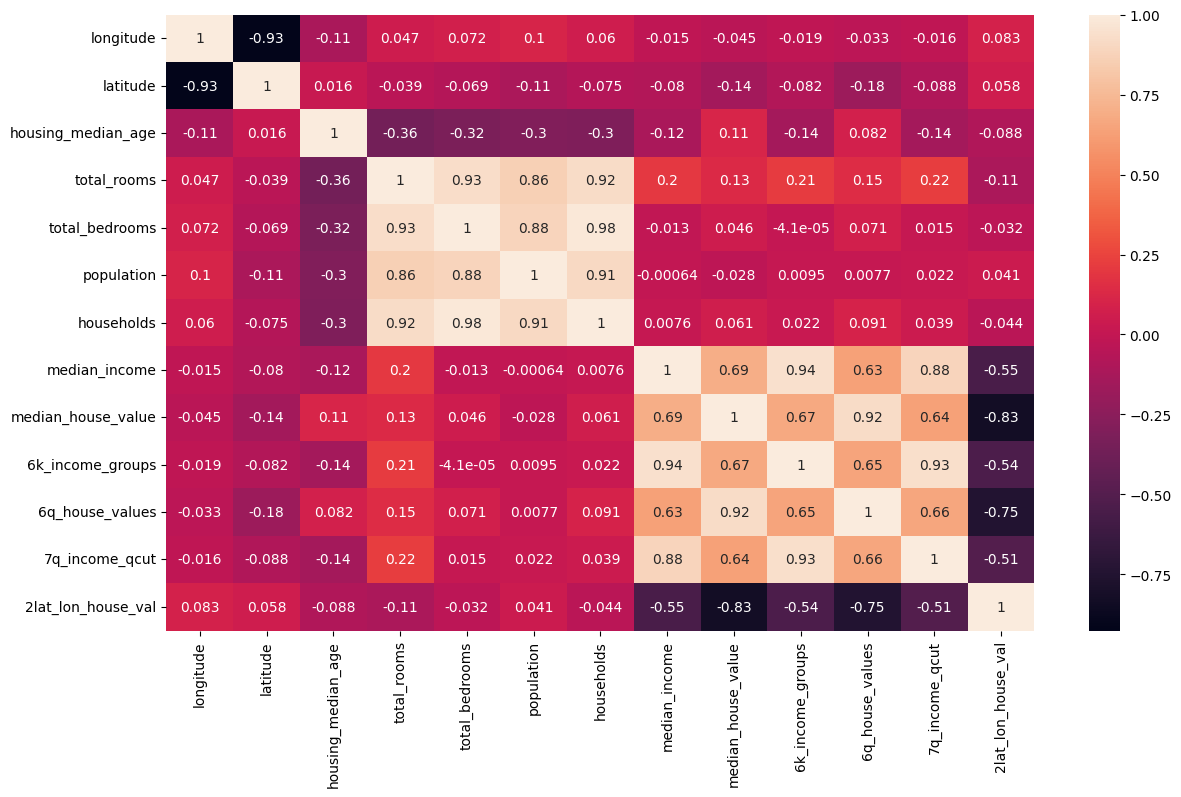

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df1.corr(), annot=True)

plt.show()

In [ ]:
y=df1['median_house_value']
X_all=df1.drop(['median_house_value'],axis=1)
X_corr=X_all.drop(['median_income', 'population', 'total_bedrooms','longitude','households'],axis=1)
X_original=df.drop(['median_house_value'],axis=1)

In [ ]:
df1.to_csv('california_df1.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
x_og_train, x_og_test, y_og_train, y_og_test = train_test_split(X_original, y, test_size=0.2, random_state=1)
x_corr_train, x_corr_test, y_corr_train, y_corr_test = train_test_split(X_corr, y, test_size=0.2, random_state=1)
x_all_train, x_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.2, random_state=1)

x_og_train.shape  # (13600, 8)
x_og_test.shape   # (3400, 8)
x_all_train.shape # (13600, 12)
x_all_test.shape  # (3400, 12)
x_corr_train.shape # (13600, 7)
x_corr_test.shape  # (3400, 7)

df.dtypes

# longitude             float64
# latitude              float64
# housing_median_age    float64
# total_rooms           float64
# total_bedrooms        float64
# population            float64
# households            float64
# median_income         float64
# median_house_value    float64
# dtype: object

df1.dtypes

# longitude             float64
# latitude              float64
# housing_median_age    float64
# total_rooms           float64
# total_bedrooms        float64
# population            float64
# households            float64
# median_income         float64
# median_house_value    float64
# 6k_income_groups        int64
# 6q_house_values         int64
# 7q_income_qcut          int64
# 2lat_lon_house_val      int32
# dtype: object

(3400, 7)

In [ ]:
x_og_train.shape  # (13600, 8)
x_og_test.shape   # (3400, 8)
x_all_train.shape # (13600, 12)
x_all_test.shape  # (3400, 12)
x_corr_train.shape # (13600, 7)
x_corr_test.shape  # (3400, 7)

(3400, 7)

In [ ]:
df.dtypes

# longitude             float64
# latitude              float64
# housing_median_age    float64
# total_rooms           float64
# total_bedrooms        float64
# population            float64
# households            float64
# median_income         float64
# median_house_value    float64
# dtype: object

df1.dtypes

# longitude             float64
# latitude              float64
# housing_median_age    float64
# total_rooms           float64
# total_bedrooms        float64
# population            float64
# households            float64
# median_income         float64
# median_house_value    float64
# 6k_income_groups        int64
# 6q_house_values         int64
# 7q_income_qcut          int64
# 2lat_lon_house_val      int32
# dtype: object

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
6k_income_groups        int64
6q_house_values         int64
7q_income_qcut          int64
2lat_lon_house_val      int32
dtype: object

---
## Helper function to create Column transformer

---

In [ ]:
def create_preprocessor(X):
    numeric_cols = X.select_dtypes(include=['float64']).columns
    categorical_cols = X.select_dtypes(include=['int']).columns
    return ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OrdinalEncoder(), categorical_cols)
        ]
    )

preprocessor_all = create_preprocessor(X_all)
preprocessor_corr = create_preprocessor(X_corr)
preprocessor_original = StandardScaler()

In [ ]:
X_all.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,6k_income_groups,6q_house_values,7q_income_qcut,2lat_lon_house_val
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,0,0,0,1
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,0,0,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

---
# Helper function to create pipelines for different models


---




This is me trying to run multiple versions of datasets with different models

In [ ]:
def create_pipeline(preprocessor, model, poly=None):
    steps = [('preprocessor', preprocessor)]
    if poly:
        steps.append(('poly', PolynomialFeatures(degree=poly)))
    steps.append(('model', model))
    return Pipeline(steps=steps)

# LINEAR REGRESSION



In [ ]:
linear_original = create_pipeline(preprocessor_original, LinearRegression())
linear_all = create_pipeline(preprocessor_all, LinearRegression())
linear_corr = create_pipeline(preprocessor_corr, LinearRegression())

print('linear original score: ', cross_val_score(linear_original, x_og_train, y_og_train, cv=5).mean())   #linear original score:  0.6345042743414051
print('linear all score: ', cross_val_score(linear_all, x_all_train, y_all_train, cv=5).mean())           # linear all score:  0.9202944853178565
print('linear corr score: ', cross_val_score(linear_corr, x_corr_train, y_corr_train, cv=5).mean())       # linear corr score:  0.9086257375090965

linear original score:  0.6345042743414051
linear all score:  0.9202944853178565
linear corr score:  0.9086257375090965


In [ ]:
# Fitting the Linear Model
linear_original.fit(x_og_train, y_og_train)
linear_all.fit(x_all_train, y_all_train)
linear_corr.fit(x_corr_train, y_corr_train)

print('mae for test original: ',mean_absolute_error(y_og_test, linear_original.predict(x_og_test)), 'r2: ', r2_score(y_og_test, linear_original.predict(x_og_test)))
# mae for test original:  49712.99694172417 r2:  0.6603046069190881
print('mae for test all: ',mean_absolute_error(y_all_test, linear_all.predict(x_all_test)), 'r2: ', r2_score(y_all_test, linear_all.predict(x_all_test)))
# mae for test all:  21886.726792771417 r2:  0.9200406694734176
print('mae for test corr: ',mean_absolute_error(y_corr_test, linear_corr.predict(x_corr_test)), 'r2: ', r2_score(y_corr_test, linear_corr.predict(x_corr_test)))
# mae for test corr:  24015.045250567826 r2:  0.9072164480197255

mae for test original:  49712.99694172417 r2:  0.6603046069190881
mae for test all:  21886.726792771417 r2:  0.9200406694734176
mae for test corr:  24015.045250567826 r2:  0.9072164480197255


In [ ]:
#Permutaion importance
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Weight,Feature
1.2731 ± 0.0218,latitude
1.1459 ± 0.0129,longitude
0.8829 ± 0.0089,median_income
0.3712 ± 0.0041,total_bedrooms
0.2710 ± 0.0063,population
0.0413 ± 0.0043,total_rooms
0.0319 ± 0.0048,households
0.0293 ± 0.0038,housing_median_age


In [ ]:

perm_original = PermutationImportance(linear_original, random_state=1).fit(x_og_train, y_og_train)
eli5.show_weights(perm_original, feature_names = x_og_train.columns.tolist())

perm_all = PermutationImportance(linear_all, random_state=1).fit(x_all_train, y_all_train)
eli5.show_weights(perm_all, feature_names = x_all_train.columns.tolist())

perm_corr = PermutationImportance(linear_corr, random_state=1).fit(x_corr_train, y_corr_train)
eli5.show_weights(perm_corr, feature_names = x_corr_train.columns.tolist())


Weight,Feature
0.8420 ± 0.0128,6q_house_values
0.1726 ± 0.0039,2lat_lon_house_val
0.1343 ± 0.0031,6k_income_groups
0.0651 ± 0.0023,7q_income_qcut
0.0026 ± 0.0003,housing_median_age
0.0000 ± 0.0001,latitude
0.0000 ± 0.0000,total_rooms


# POLYNOMIAL FEATURES LINEAR REGRESSION

In [ ]:
poly_original = create_pipeline(preprocessor_original, LinearRegression(), poly=2)
poly_all = create_pipeline(preprocessor_all, LinearRegression(), poly=3)
poly_corr = create_pipeline(preprocessor_corr, LinearRegression(), poly=4)

print('poly original score: ', cross_val_score(poly_original, x_og_train, y_og_train, cv=5).mean())
# oly original score:  0.6737611355444434, 3: -1.536164206737916, 4: -27.049435333688336
print('poly all score: ', cross_val_score(poly_all, x_all_train, y_all_train, cv=5).mean())
# poly all score:  0.9494153936419023, 3: 0.9419013806296158, 4: -5.447477721127384,
print('poly corr score: ', cross_val_score(poly_corr, x_corr_train, y_corr_train, cv=5).mean())
# poly corr score:  0.9446918006926094, 3: 0.9462968593691325, 4: 0.9435884515722112, 5: 0.9232414568110754

poly corr score:  -45455849.77252744


In [ ]:
poly_original.fit(x_og_train, y_og_train)
poly_all.fit(x_all_train, y_all_train)
poly_corr.fit(x_corr_train, y_corr_train)

print('mae poly original: ', mean_absolute_error(y_og_test, poly_original.predict(x_og_test)), 'r2: ', r2_score(y_og_test, poly_original.predict(x_og_test)))
# mae poly original:  43666.584860320545 r2:  0.7212614643971417, 3: 41254.35140375651 r2:  0.7415763294545767, / 4: none
print('mae poly all: ', mean_absolute_error(y_all_test, poly_all.predict(x_all_test)), 'r2: ', r2_score(y_all_test, poly_all.predict(x_all_test)))
# mae poly all:  17673.642929031586 r2:  0.9477449384842672, 3: 16969.423652211553 r2:  0.9488842868956057, 4: 21464.09173495573 r2:  0.7245624040738757
print('mae poly corr: ', mean_absolute_error(y_corr_test, poly_corr.predict(x_corr_test)), 'r2: ', r2_score(y_corr_test, poly_corr.predict(x_corr_test)))
# mae poly corr:  18443.76578624262 r2:  0.9423978711376394, 3: 17890.425964822472 r2:  0.9447605650309114, / 4: 17717.91034057617 r2:  0.9458086400607069 / 5: 17846.809739756864 r2:  0.9421144146012632

mae poly corr:  341438.8430005155 r2:  -26610.29612999283


# RANDOM FOREST REGRESSOR

## New functions for tree-based models (we don't really need to scale the numeric data)


In [ ]:
def tree_encoder(X):
    categorical_cols = X.select_dtypes(include=['int']).columns
    non_categorical_cols = X.columns.difference(categorical_cols)

    transformers = []
    if len(categorical_cols) > 0:
        transformers.append(('cat', OrdinalEncoder(), categorical_cols))
    if len(non_categorical_cols) > 0:
        transformers.append(('non_cat', FunctionTransformer(validate=True), non_categorical_cols))

    return ColumnTransformer(transformers)

# Create the preprocessors for each dataset
tree_prep_all = tree_encoder(X_all)
tree_prep_corr = tree_encoder(X_corr)
tree_prep_original = tree_encoder(X_original)

In [ ]:
# Define the function for creating the pipeline
def tree_pipes(preprocessor, model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# Define the pipelines for each dataset
forest_all = tree_pipes(tree_prep_all, RandomForestRegressor(n_estimators=100, random_state=1, max_depth=20))
forest_corr = tree_pipes(tree_prep_corr, RandomForestRegressor(n_estimators=100, random_state=1, max_depth=20))
forest_original = tree_pipes(tree_prep_original, RandomForestRegressor(n_estimators=100, random_state=1, max_depth=20))

# Fit the models
forest_original.fit(x_og_train, y_og_train)
forest_all.fit(x_all_train, y_all_train)
forest_corr.fit(x_corr_train, y_corr_train)

# Cross-validation scores
print('forest original score: ', cross_val_score(forest_original, x_og_train, y_og_train, cv=5).mean())
print('forest all score: ', cross_val_score(forest_all, x_all_train, y_all_train, cv=5).mean())
print('forest corr score: ', cross_val_score(forest_corr, x_corr_train, y_corr_train, cv=5).mean())

# Evaluate the models
print('mae forest original: ', mean_absolute_error(y_og_test, forest_original.predict(x_og_test)), 'r2: ', r2_score(y_og_test, forest_original.predict(x_og_test)))
print('mae forest all: ', mean_absolute_error(y_all_test, forest_all.predict(x_all_test)), 'r2: ', r2_score(y_all_test, forest_all.predict(x_all_test)))
print('mae forest corr: ', mean_absolute_error(y_corr_test, forest_corr.predict(x_corr_test)), 'r2: ', r2_score(y_corr_test, forest_corr.predict(x_corr_test)))


---
# OUTCOMES

---

linear original score:  0.6345042743414051 /
mae for test original:  49712.99694172417 r2:  0.6603046069190881

linear all score:  0.9202944853178565 /
mae for test all:  21886.726792771417 r2:  0.9200406694734176

linear corr score:  0.9086257375090965 /
mae for test corr:  24015.045250567826 r2:  0.9072164480197255

---
poly original score:  0.6737611355444434, 3: -1.536164206737916, 4: -27.049435333688336 /

/ mae poly original:  43666.584860320545 r2:  0.7212614643971417, 3: 41254.35140375651 r2:  0.7415763294545767, / 4: none

poly all score:  0.9494153936419023, 3: 0.9419013806296158, 4: -5.447477721127384 /

/ mae poly all:  17673.642929031586 r2:  0.9477449384842672, 3: 16969.423652211553 r2:  0.9488842868956057, 4: 21464.09173495573 r2:  0.7245624040738757

poly corr score:  0.9446918006926094, 3: 0.9462968593691325, 4: 0.9435884515722112, 5: 0.9232414568110754 /

/ mae poly corr:  18443.76578624262 r2:  0.9423978711376394, 3: 17890.425964822472 r2:  0.9447605650309114, / 4: 17717.91034057617 r2:  0.9458086400607069 / 5: 17846.809739756864 r2:  0.9421144146012632

---
forest original score:  0.8147097141829148 / rerun: mae forest original:  31306.361585079743 r2:  0.8313472645056008

forest all score:  0.9393575498012108 / # rerun: mae forest all:  17981.81583117025 r2:  0.9390580840577447

forest corr score:  0.9460419661723398 / rerun: mae forest corr:  16966.168137524197 r2:  0.9471158799258639

---
mae original score:  0.46200926361092803 / 500&10: 0.8170145348889699 /


mae all score:  0.7934881707027424 / 500&10: 0.925582089594599 /


mae corr score:  0.8151885905132474 / 500&10: 0.9443315244863516


# XGB REGERESSOR

In [ ]:
xgb_original=tree_pipes(tree_prep_original, XGBRegressor(n_estimators=500, random_state=1, learning_rate=0.03, max_depth=10))
xgb_all=tree_pipes(tree_prep_all, XGBRegressor(n_estimators=500, random_state=1, learning_rate=0.03, max_depth=10))
xgb_corr=tree_pipes(tree_prep_corr, XGBRegressor(n_estimators=500, random_state=1, learning_rate=0.03, max_depth=10))

xgb_original.fit(x_og_train, y_og_train)
xgb_all.fit(x_all_train, y_all_train)
xgb_corr.fit(x_corr_train, y_corr_train)

print('xgb original score: ', cross_val_score(xgb_original, x_og_train, y_og_train, cv=5).mean())
# xgb original score:  0.8147097141829148
print('xgb all score: ', cross_val_score(xgb_all, x_all_train, y_all_train, cv=5).mean())
# xgb all score:  0.9393575498012108
print('xgb corr score: ', cross_val_score(xgb_corr, x_corr_train, y_corr_train, cv=5).mean())
# xgb corr score:  0.9460419661723398

print('mae xgb original: ', mean_absolute_error(y_og_test, xgb_original.predict(x_og_test)), 'r2: ', r2_score(y_og_test, xgb_original.predict(x_og_test)))
# mae xgb original:  31306.361585079743 r2:  0.8313472645056008
print('mae xgb all: ', mean_absolute_error(y_all_test, xgb_all.predict(x_all_test)), 'r2: ', r2_score(y_all_test, xgb_all.predict(x_all_test)))
#
print('mae xgb corr: ', mean_absolute_error(y_corr_test, xgb_corr.predict(x_corr_test)), 'r2: ', r2_score(y_corr_test, xgb_corr.predict(x_corr_test)))
#

mae original score:  0.8170145348889699
mae all score:  0.925582089594599
mae corr score:  0.9443315244863516


# SUPPORT VECTOR REGRESSOR

In [ ]:
svm_original=create_pipeline(preprocessor_original, SVR(C=1.0, kernel='rbf', epsilon=0.1))
svm_all=create_pipeline(preprocessor_all, SVR(C=1.0, kernel='rbf', epsilon=0.1))
svm_corr=create_pipeline(preprocessor_corr, SVR(C=1.0, kernel='rbf', epsilon=0.1))

print('svm original score: ', cross_val_score(svm_original, x_og_train, y_og_train, cv=5).mean())
print('svm all score: ', cross_val_score(svm_all, x_all_train, y_all_train, cv=5).mean())
print('svm corr score: ', cross_val_score(svm_corr, x_corr_train, y_corr_train, cv=5).mean())

In [ ]:
svm_original.fit(x_og_train, y_og_train)
svm_all.fit(x_all_train, y_all_train)
svm_corr.fit(x_corr_train, y_corr_train)

print('mae svm original: ', mean_absolute_error(y_og_test, svm_original.predict(x_og_test)), 'r2: ', r2_score(y_og_test, svm_original.predict(x_og_test)))
print('mae svm all: ', mean_absolute_error(y_all_test, svm_all.predict(x_all_test)), 'r2: ', r2_score(y_all_test, svm_all.predict(x_all_test)))
print('mae svm corr: ', mean_absolute_error(y_corr_test, svm_corr.predict(x_corr_test)), 'r2: ', r2_score(y_corr_test, svm_corr.predict(x_corr_test)))